<a href="https://colab.research.google.com/github/nilarghadevkaran89-commits/projects/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3762376175.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


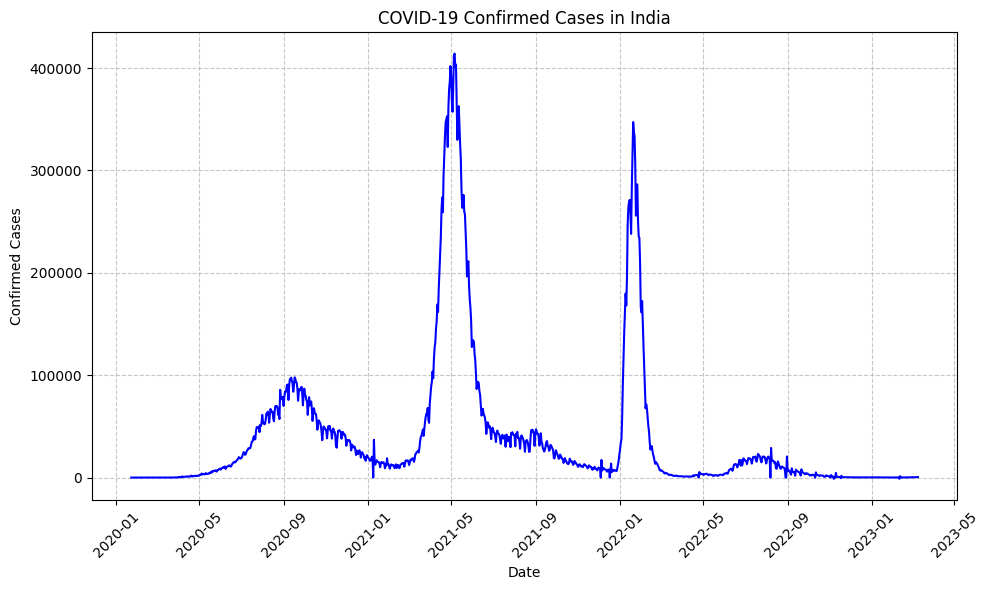

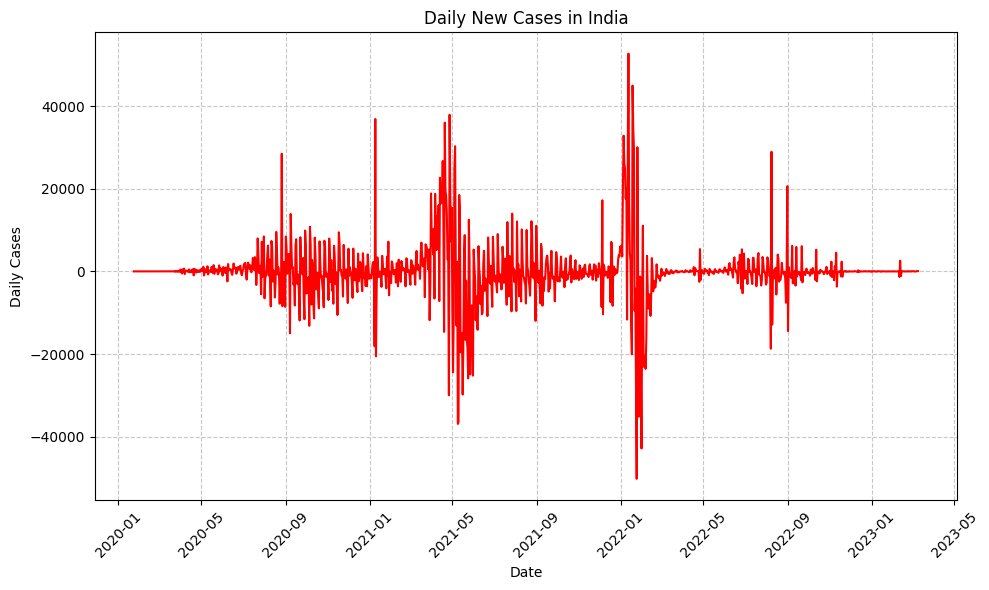

Recent Growth Rate (%):
Country/Region
2023-03-05   -13.271605
2023-03-06    -5.338078
2023-03-07    22.556391
2023-03-08    16.257669
2023-03-09    16.094987
Name: India, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- SECTION 1: Data Loading and Initial Preparation ---
# Load the COVID-19 confirmed cases dataset.
df = pd.read_csv("/content/CONVENIENT_global_confirmed_cases.csv.zip")

# Filter out the row where 'Country/Region' is 'Province/State'.
df = df[df['Country/Region'] != 'Province/State']

# Set the 'Country/Region' column as the DataFrame's index.
df = df.set_index('Country/Region')

# Convert the DataFrame's index to datetime objects.
df.index = pd.to_datetime(df.index)

# --- SECTION 2: Data Selection and Initial Visualization ---
# Select time series data for 'India'.
india = df["India"]

plt.figure(figsize=(10, 6))
plt.plot(india.index, india.values, color='blue')
plt.title("COVID-19 Confirmed Cases in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- SECTION 3: Daily Growth Calculation and Visualization ---
# Calculate daily new cases.
india_daily = india.diff()

plt.figure(figsize=(10, 6))
plt.plot(india_daily.index, india_daily.values, color='red')
plt.title("Daily New Cases in India")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- SECTION 4: Growth Rate Percentage Calculation ---
# Calculate the percentage change (growth rate) of confirmed cases daily.
growth_rate = india.pct_change() * 100

# Print the last few entries of the calculated growth rate.
print("Recent Growth Rate (%):")
print(growth_rate.tail())

### Bar Chart: Daily New Cases for the Last 30 Days in India

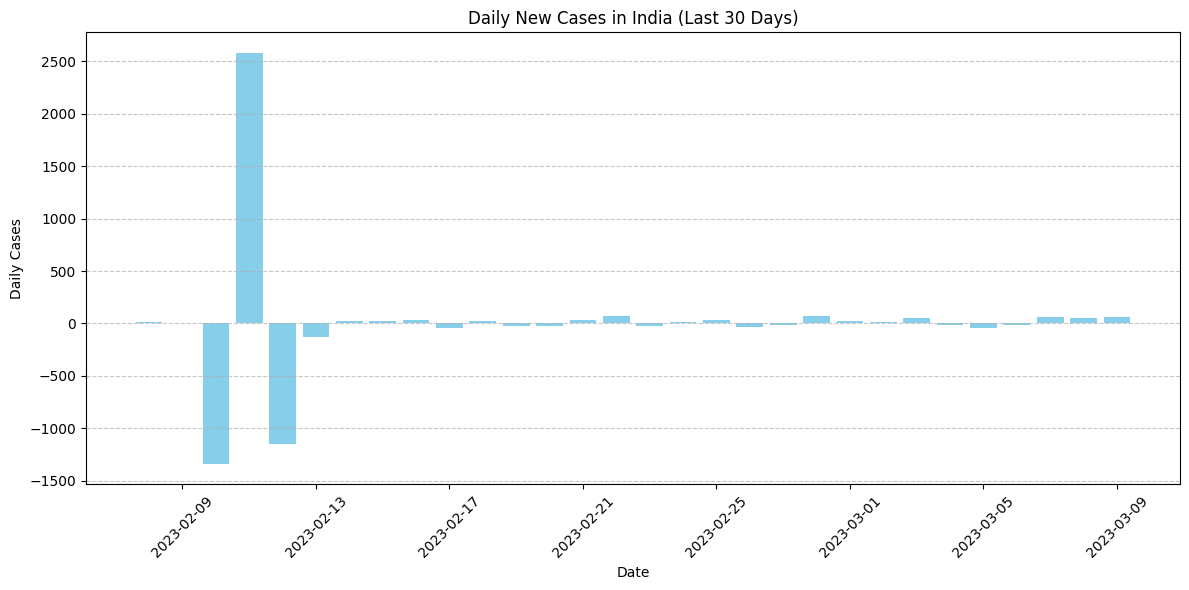

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(india_daily.tail(30).index, india_daily.tail(30).values, color='skyblue')
plt.title("Daily New Cases in India (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Histogram: Distribution of Daily New Cases in India

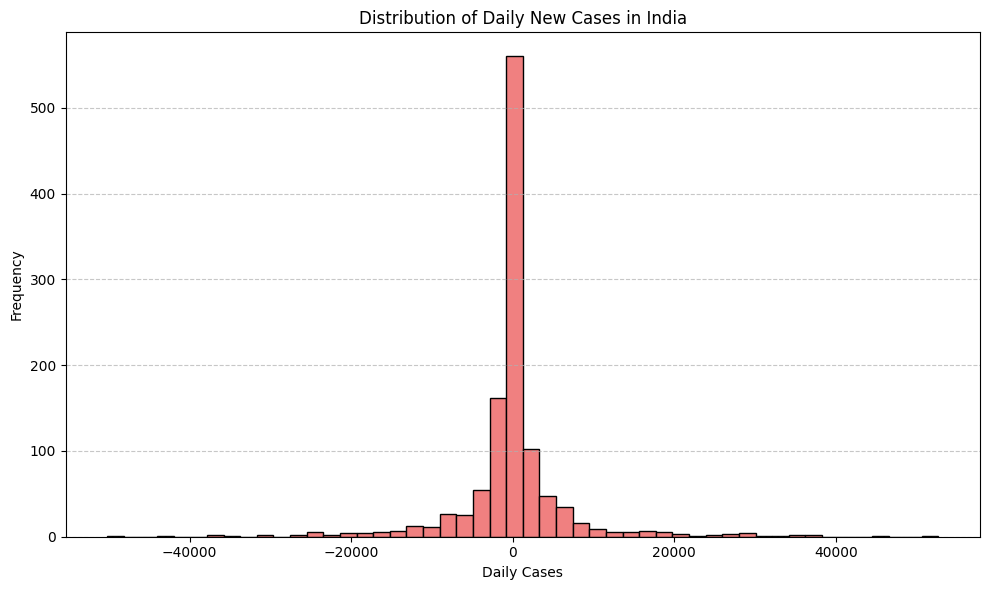

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(india_daily.dropna(), bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution of Daily New Cases in India")
plt.xlabel("Daily Cases")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Scatter Plot: Daily Cases vs. Growth Rate in India

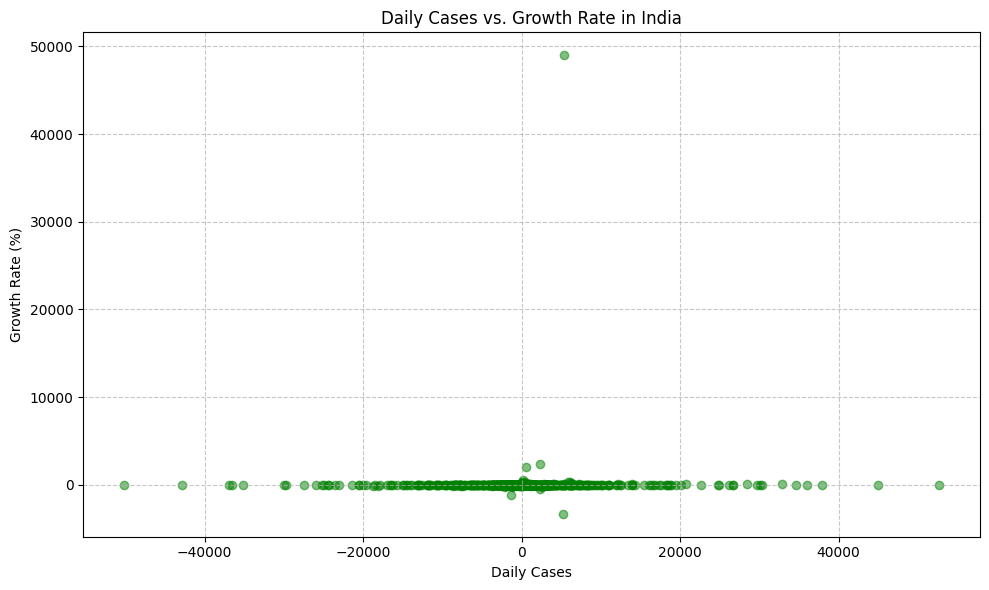

In [8]:
plt.figure(figsize=(10, 6))
# Align indices for plotting
merged_data = pd.DataFrame({'Daily Cases': india_daily, 'Growth Rate (%)': growth_rate}).dropna()
plt.scatter(merged_data['Daily Cases'], merged_data['Growth Rate (%)'], alpha=0.5, color='green')
plt.title("Daily Cases vs. Growth Rate in India")
plt.xlabel("Daily Cases")
plt.ylabel("Growth Rate (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()